In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib as mlp
label_size=14
mlp.rcParams['xtick.labelsize']=label_size
mlp.rcParams['ytick.labelsize']=label_size

# Amortiguado 

In [33]:
k = 5 # Constante del muelle
m = 1.0   # Masa
B = .5# Constante de amortiguación

def armonico(variables, t):
    x, y = variables
    return [y, -k * x / m - B / m * y]

inicial = [0.6, 0.4] # Vector de posición inicial y velocidad inicial
# condiciones iniciales x(t=0)=0.6 [m] y(t=0)=0.4 [m/s]

#tiempo = np.linspace(0, 15)  # Dominio temporal de 0 a 15 
tiempo = np.arange(0, 20, .01)

resultado = odeint(armonico, inicial, tiempo) 
#El sistema se resuelve  con 
#odeint(sistema, condiciones iniciales, rango donde graficaremos)

In [34]:
xx, yy=resultado.T #extraer posición y velocidad.omega0 = k/m

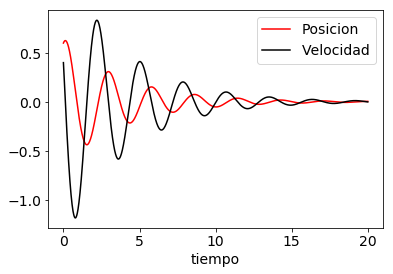

In [35]:
plt.plot(tiempo, xx, c = 'r', label="Posicion") 
plt.plot(tiempo, yy, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

In [36]:
omega0 = k/m

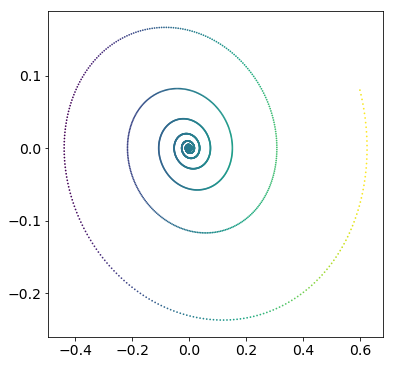

In [37]:
plt.figure(figsize = (6,6))
plt.scatter(xx, yy/omega0, lw = 0, s = 3, cmap = 'viridis', c = xx)
plt.show()

In [38]:
from ipywidgets import *

In [39]:
def amortiguado(t = 0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(tiempo, xx,  'k-')
    ax.plot(tiempo[t], xx[t],  'ro')
    ax.text(4, .6, 'tiempo =    %s'%tiempo[t])
    ax.text(4, .5, 'posición =  %s'%xx[t])
    fig.canvas.draw()
t_f = len(tiempo) 
interact_manual(amortiguado, t = (0, t_f, 1));

# Sobreamotiguado

In [40]:

k = .1 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [41]:
omega0 = k/m
Gamma = B/(2*m)

In [42]:
omega0**2, Gamma**2

(0.010000000000000002, 0.0625)

In [43]:
omega0**2 < Gamma**2

True

In [44]:

inicial = [0.6, 0.4] 
tiempo = np.arange(0, 20, .01)
resultado = odeint(armonico, inicial, tiempo)

In [45]:
xxA, yyA = resultado.T  # extraer posición y velocidad.

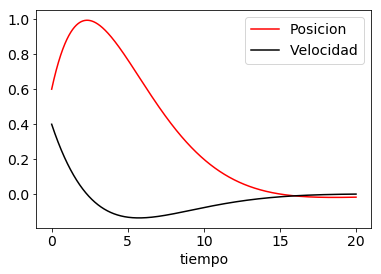

In [46]:
plt.plot(tiempo, xxA, c = 'r', label="Posicion") 
plt.plot(tiempo, yyA, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

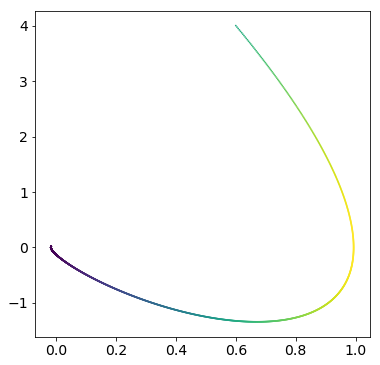

In [47]:
omega0 = k/m
plt.figure(figsize = (6,6))
plt.scatter(xxA, yyA/omega0, lw = 0, s = 3, cmap = 'viridis', c = xxA)
plt.show()

# Amortiguado Crítico

In [48]:
k = np.sqrt(.0625) # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [49]:
omega0 = k/m
Gamma = B/(2*m)

In [50]:

omega0**2, Gamma**2

(0.0625, 0.0625)

In [51]:
omega0**2 == Gamma**2

True

In [52]:


inicial = [0.6, 0.4] 
tiempo = np.arange(0, 20, .01)
resultado = odeint(armonico, inicial, tiempo)

In [53]:
xxC, yyC = resultado.T  # extraer posición y velocidad.

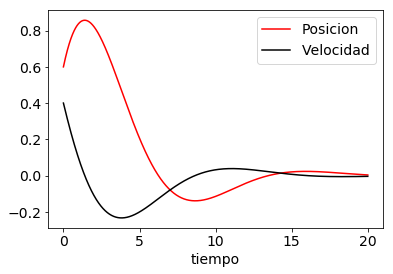

In [54]:
plt.plot(tiempo, xxC, c = 'r', label="Posicion") 
plt.plot(tiempo, yyC, c = 'k', label="Velocidad")
plt.legend(loc = 'best',prop={'size': 14})  
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

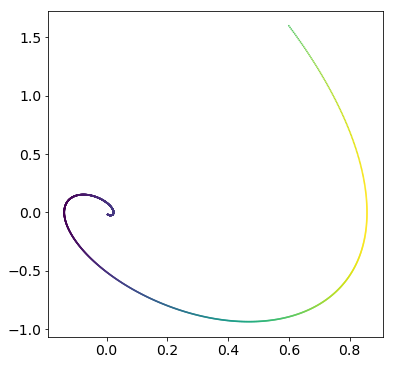

In [57]:
omega0 = k/m
plt.figure(figsize = (6,6))
plt.scatter(xxC, yyC/omega0, lw = 0, s = 3, cmap = 'viridis', c = xxC)
plt.show()

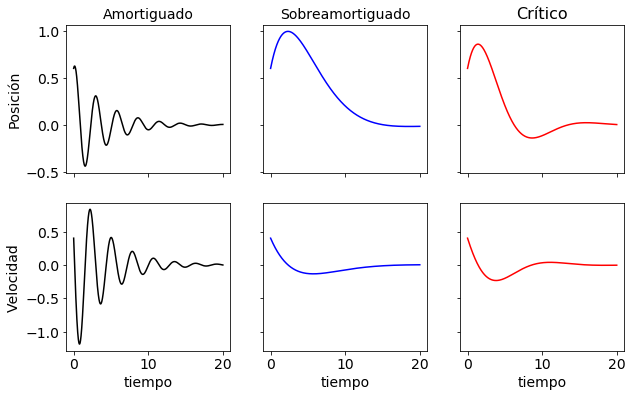

In [58]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col',
                                                       sharey='row',figsize =(10,6))
ax1.plot(tiempo, xx, c = 'k') 
ax1.set_title('Amortiguado', fontsize = 14)
ax1.set_ylabel('Posición', fontsize = 14)
ax2.plot(tiempo, xxA, c = 'b') 
ax2.set_title('Sobreamortiguado', fontsize = 14)
ax3.plot(tiempo, xxC, c = 'r') 
ax3.set_title('Crítico', fontsize = 16)
ax4.plot(tiempo, yy, c = 'k')
ax4.set_ylabel('Velocidad', fontsize = 14)
ax4.set_xlabel('tiempo', fontsize = 14)
ax5.plot(tiempo, yyA, c = 'b')
ax5.set_xlabel('tiempo', fontsize = 14)
ax6.plot(tiempo, yyC, c = 'r')
ax6.set_xlabel('tiempo', fontsize = 14)
plt.show()